In [50]:
import pandas as pd
import seaborn as sns
import numpy as np

In [41]:
data=pd.read_excel("Caso 01 - Cobranza Sector Financiero.xlsx")

In [42]:
data.drop(columns=["Nombres", "Numero Documento", "Sector Economico"], inplace=True)

En esta oarte vamos a hacer un análisis de la distribución de los datos Basados en el rango de endeudamiento de las personas. En la tabla de abajo podmeos ver que la mayoría del dataset **Aproximadamente el 51% de los datos** está en el rango de endeudamiento de entre 1 a 15 millones de pesos

In [49]:
pd.crosstab(data['Rango endeudamiento'], data["PRODUCTO"], margins=True)/89062

PRODUCTO,CH PROPIA,CH TITU,CONSUMO,MASIVO SUFI,TARJETAS DE CREDITO,VEHICULOS SUFI,All
Rango endeudamiento,,,,,,,
1 a 15,0.029755,0.000135,0.115212,0.024646,0.316038,0.027284,0.513070
100 a 200,0.003357,0.000168,0.003346,0.000022,0.002504,0.000921,0.010319
15 a 50,0.049887,0.000674,0.067605,0.003279,0.060149,0.033325,0.214918
50 a 100,0.014125,0.000550,0.019234,0.000180,0.010813,0.003840,0.048741
<1M,0.000303,0.000000,0.013463,0.004907,0.192338,0.001235,0.212245
>200,0.000483,0.000045,0.001482,0.000000,0.000494,0.000281,0.002785
All,0.097909,0.001572,0.220341,0.033033,0.582336,0.066886,1.002077


Ahora veamos cual es el monto de dinero en deuda con relación al rango de endeudamiento.
En la tabla de abajo podemos observar que la mayor parte del dinero en mora está

/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


<Axes: xlabel='Rango endeudamiento', ylabel='Endeudamiento'>

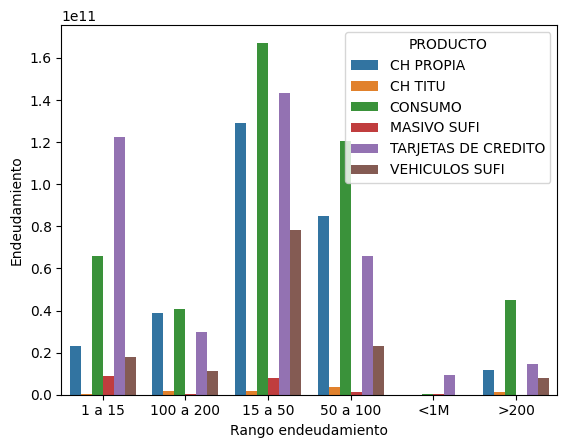

In [97]:
endeudamiento_cuadrante=data.groupby(["Rango endeudamiento", "PRODUCTO"]).aggregate({"PRODUCTO":"count", "Endeudamiento":"sum"})
endeudamiento_cuadrante.rename(columns=({"PRODUCTO":"Conteo Productos"}), inplace=True)
endeudamiento_cuadrante.reset_index(inplace=True)
sns.barplot(endeudamiento_cuadrante, x="Rango endeudamiento", y="Endeudamiento", hue="PRODUCTO")